<a href="https://colab.research.google.com/github/gonzoreyes07/EDP-I/blob/main/Integral_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [9]:
# Definimos nuestra función de pulso unitario
def pulso(x):
     return np.where(np.abs(x)<=1, 1, 0)

Text(0, 0.5, 'y')

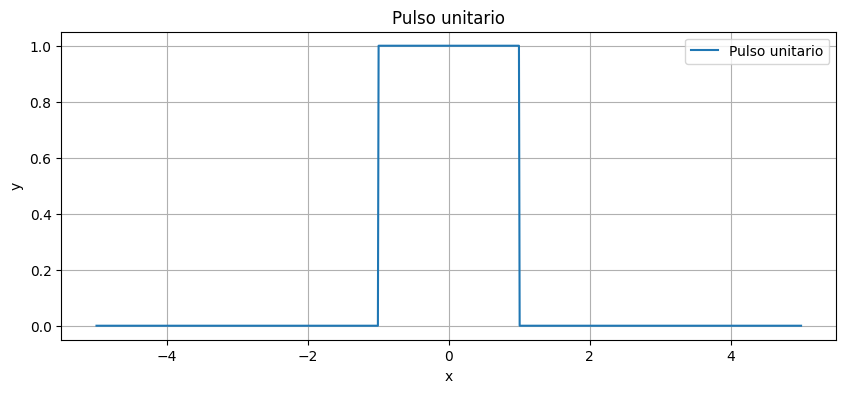

In [22]:
# Gráfica de la función
x_valores=np.linspace(-5,5,1000)
y_valores=pulso(x_valores)

plt.figure(figsize=(10,4))
plt.plot(x_valores, y_valores, label="Pulso unitario")
plt.title("Pulso unitario")
plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

In [11]:
x, w=sp.symbols('x w', real=True)

In [12]:
f = sp.Piecewise((1, sp.And(x>=-1, x<=1)), (0, True))

In [15]:
F = sp.integrate(f*sp.cos(w*x), (x,-sp.oo,sp.oo)) # Transformada de Fourier en cosenos para n = pares

In [17]:
F_w=sp.simplify(F) # Reconstrucción utilizando la inversa de Fourier

In [18]:
x_valores=sp.Symbol('x', real=True)
f_reconstruida=(1/sp.pi)*sp.integrate(F_w*sp.cos(w*x_valores), (w,0,sp.oo))
f_reconstruida_func = sp.lambdify(x_valores, f_reconstruida)

In [19]:
x_plot=np.linspace(-5,5,1000)
y_reconstruida=np.array([f_reconstruida_func(val) for val in x_plot])

<lambdifygenerated-1>:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(lambda w: select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)*cos(w*x)/w,2*cos(w*x)], default=nan), 0, inf)[0]/pi
<lambdifygenerated-1>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda w: select([logical_or.reduce((greater(w, 0),less(w, 0))),True], [2*sin(w)*cos(w*x)/w,2*cos(w*x)], default=nan), 0, inf)[0]/pi


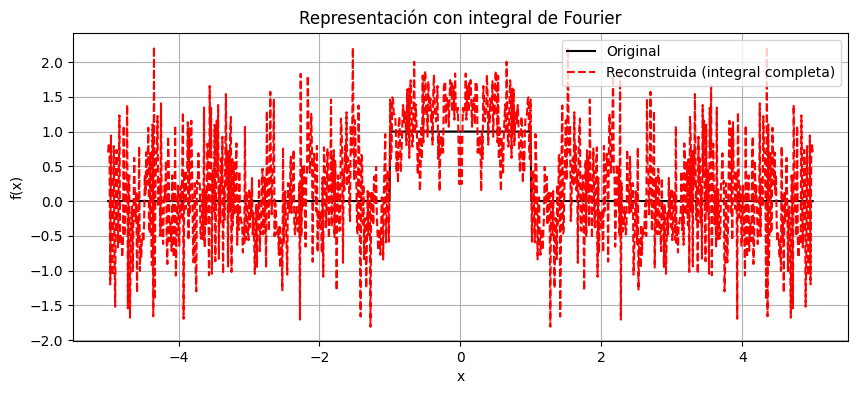

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(x_plot, pulso_unitario(x_plot), 'k', label="Original")
plt.plot(x_plot, y_reconstruida, 'r--', label="Reconstruida (integral completa)")
plt.title("Representación con integral de Fourier")
plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

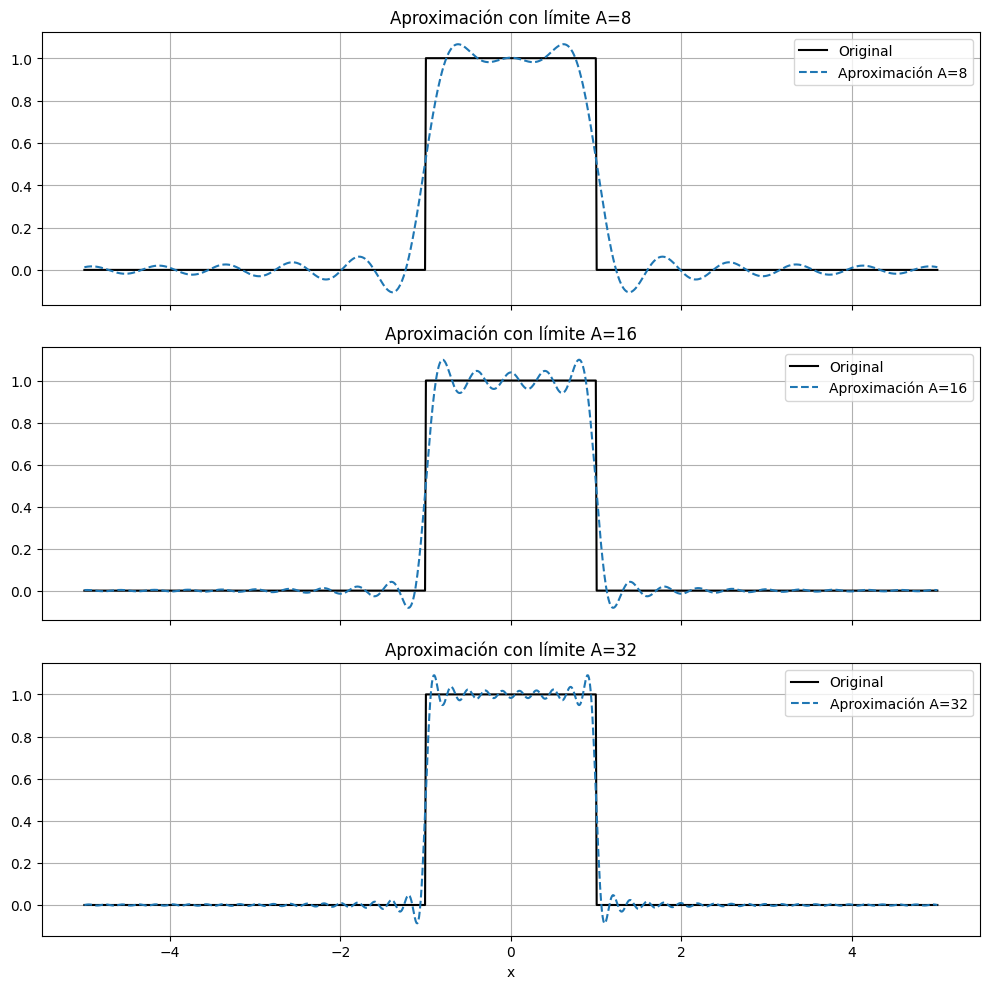

In [31]:
# Usamos x_sim para una integral simbólica
x_sim = sp.Symbol('x', real=True)

fig, ax=plt.subplots(3,1,figsize=(10,10),sharex=True)
A_valores=[8, 16, 32]

for i, A in enumerate(A_valores):
    integral_aprox = (1/sp.pi) * sp.integrate(F_w * sp.cos(w * x_sim), (w, 0, A))
    f_aprox_func = sp.lambdify(x_sim, integral_aprox)
    y_aprox = np.array([f_aprox_func(val) for val in x_plot])

    ax[i].plot(x_plot, pulso(x_plot), 'k', label="Original")
    ax[i].plot(x_plot, y_aprox, '--', label=f"Aproximación A={A}")
    ax[i].set_title(f"Aproximación con límite A={A}")
    ax[i].grid(True)
    ax[i].legend()

plt.xlabel("x")
plt.tight_layout()
plt.show()